### Laboratorio de Datos - Ejercitación 1
 1/6/2021

---

####  Consigna

El objetivo fue aplicar técnicas de reducción de la dimensión, para luego usar las dimensiones reducidas con el propósito de hacer un clustering de los datos en grupos. Finalmente, usar las etiquetas obtenidas de ese clustering para clasificar nuevos datos.

Técnicas
**aprendizaje no supervisado**
 **aprendizaje supervisado**

---

dataset "fashion-mnist" (https://github.com/zalandoresearch/fashion-mnist), de 70000 imágenes de 28x28 píxeles en escala de grises divididas en 10 clases:


In [ ]:
# importo el dataset
from keras.datasets import mnist,fashion_mnist

# separo los datos en el conjunto de entrenamiento y evaluación con sus etiquetas correspondientes.
(X_train_raw, y_train), (X_test_raw, y_test) = fashion_mnist.load_data()  # cargo los dataset de entrenamiento y testeo

# reshapeamos para obtener un vector de 784 elementos (features) por cada imagen (samples)
X_train = X_train_raw.reshape(60000, -1) # no tocamos el numero de samples, 60000, pero reshapeamos las demas dimensiones
X_test = X_test_raw.reshape(10000, -1) # no tocamos el numero de samples, 60000, pero reshapeamos las demas dimensiones

X_train = X_train.astype('float32') # transformamos el tipo de datos a "float32"
X_test = X_test.astype('float32') # transformamos el tipo de datos a "float32"

# normalizamos por el maximo valor que pueden tener los pixels para que los valores queden entre 0 y 1
X_train = X_train/255.0
X_test = X_test/255.0

# print the final input shape ready for training
print("Matriz de entrenamiento shape", X_train.shape)
print("Matriz de testeo shape", X_test.shape)

4431872/4422102 [==============================] - 0s 0us/step
Matriz de entrenamiento shape (60000, 784)
Matriz de testeo shape (10000, 784)


###Primer paso


In [ ]:
#Primer paso

# Librerias generales y montaje del drive
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

# Clase para realizar componentes principales
from sklearn.decomposition import PCA

# Estandarizador (transforma las variables en z-scores)
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler() # Creamos el estandarizador para usarlo posteriormente

In [ ]:
# Ajustamos el estandarizador
std_scale.fit(X_train)

# Aplicamos el estandarizador y obtenemos la matriz de features escaleados
X_train_scaled = std_scale.transform(X_train)

In [ ]:
# Creación del modelo. Si el número de componentes no se específica,
# se obtienen tantas componentes principales como features en nuestro dataset.
pca = PCA(n_components= None)

In [ ]:
# Ajustamos el modelo a los datos escaleados
pca.fit(X_train_scaled)

# Obtenemos la descripción de los datos en el espacio de componentes principales
X_train_pca = pca.transform(X_train_scaled)

print('Dimensiones de la matriz en componentes principales: {}'.format(X_train_pca.shape))
print(X_train_pca)

Dimensiones de la matriz en componentes principales: (60000, 784)
[[-8.0117321e-01  2.0866760e+01 -1.2945171e+01 ... -1.1026844e-01
  -1.4078691e-02  5.9457563e-02]
 [ 1.7074207e+01 -4.9685173e+00 -2.0778544e+00 ...  1.4396225e-02
  -8.7959655e-03 -6.5454561e-03]
 [-9.6016407e+00 -1.2296110e+01  1.0822548e+00 ...  3.1704009e-03
   7.9233544e-03  1.4937655e-02]
 ...
 [ 9.3776636e+00 -1.3105858e+01 -8.8382721e+00 ...  2.7277462e-02
  -4.5000674e-04  5.0364994e-04]
 [-9.6456366e+00 -7.0952973e+00  6.9453030e+00 ...  4.7226455e-03
   7.9852100e-03 -1.8133090e-03]
 [-2.1317078e+01 -1.7413688e+00  5.4762945e+00 ... -1.0378803e-01
  -1.7314008e-02 -1.0174326e-02]]


###Segundo paso


Text(0.5, 0, 'Cantidad de componentes principales')

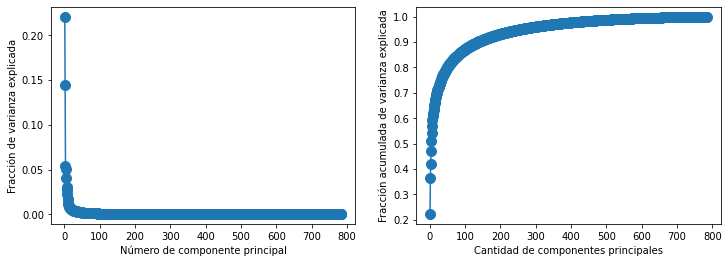

In [ ]:
# con .explained_variance_ratio_ vemos la fracción de información que aporta cada componente
evr = pca.explained_variance_ratio_

# Graficamos la fracción de varianza que aporta cada componente
# y la información acumulada
fig, ax = plt.subplots(1, 2, figsize = (12, 4))

ax[0].plot(range(1, len(evr) + 1), evr, '.-', markersize = 20)
ax[0].set_ylabel('Fracción de varianza explicada')
ax[0].set_xlabel('Número de componente principal')

# Calculamos el acumulado con la función cumsum de numpy
varianza_acumulada = np.cumsum(evr)

ax[1].plot(range(1, len(evr) + 1), varianza_acumulada, '.-', markersize = 20)
ax[1].set_ylabel('Fracción acumulada de varianza explicada')
ax[1].set_xlabel('Cantidad de componentes principales')

###Tercer paso



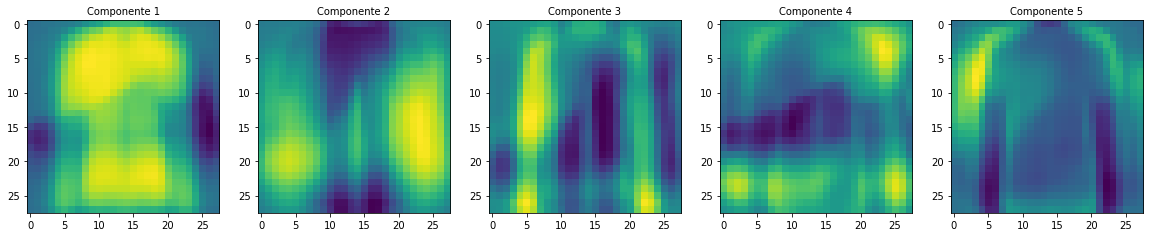

In [ ]:
fig, ax = plt.subplots(1, 5, figsize = (20, 10)) # seteo el tamano de la figura

# Hacemos un loop sobre las primeras 5 componentes
for pc in range(5):

  ax[pc].imshow(pca.components_[pc].reshape(28, 28), interpolation='none', cmap="viridis") # plotea la image dada por pc-componente principal en formato (28,28) para imagenes en escala de grises (tengo que reshapear)

  ax[pc].set_title("Componente {}".format(pc + 1), fontsize = 10) # pongo el titulo a los plots con el componente



plt.show()

###Cuarto paso

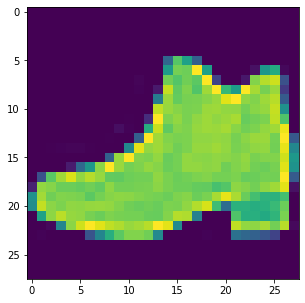

In [ ]:
# Elegimos alguna imagen
clothesID = 15

fig, ax = plt.subplots(figsize = (5, 5)) # seteo el tamano de la figura

ax.imshow(X_train[clothesID, :].reshape(28, 28), interpolation='none', cmap="viridis") # plotea la imagen de índice faceid en formato (28,28) para imagenes en escala de grises (tengo que reshapear)

# ax.set_title("Ropa: {}".format(X_train[clothesID]), fontsize = 10) # features de imagen


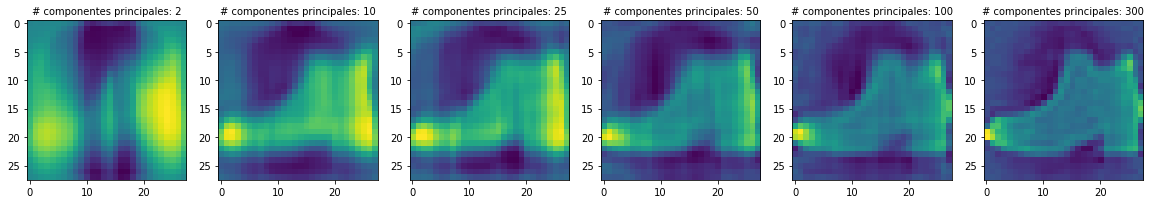

In [ ]:
fig, ax = plt.subplots(1, 6, figsize = (20, 10)) # seteo el tamano de la figura

fig_index = 0 # Indice para indicar donde hacer la figura

# Recorremos distinta cantidad de componentes
for p in [2, 10, 25, 50, 100, 300]:

  # Creación del modelo de PCA con p componentes
  pca = PCA(n_components = p)

  # Ajuste y transformación de los datos
  pca.fit(X_train_scaled)
  X_pca = pca.transform(X_train_scaled)

  # Reconstrucción de la cara desde el espacio reducido!!!
  X_r = pca.inverse_transform(X_pca)

  # Ploteo de la cara reconstruida con el mismo código de antes
  ax[fig_index].imshow(X_r[clothesID, :].reshape(28, 28), interpolation='none', cmap="viridis") # plotea la imagen de índice faceid en formato (28,28) para imagenes en escala de color + reshape

  ax[fig_index].set_title("# componentes principales: {}".format(p), fontsize = 10) # pongo el titulo


  fig_index += 1

plt.show()

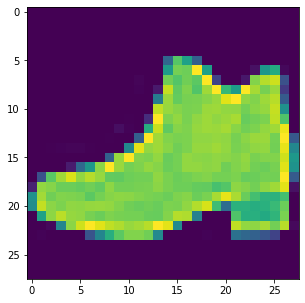

In [ ]:
#Lo repito para otra imagen

# Elegimos alguna imagen
clothesID2 = 39000

fig, ax = plt.subplots(figsize = (5, 5)) # seteo el tamano de la figura

ax.imshow(X_train[clothesID, :].reshape(28, 28), interpolation='none', cmap="viridis") # plotea la imagen de índice faceid en formato (28,28) para imagenes en escala de grises (tengo que reshapear)



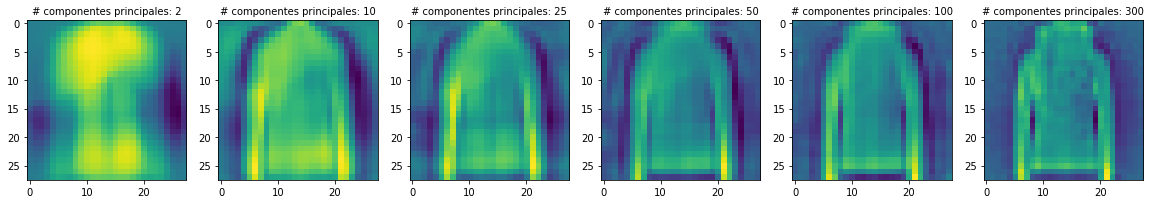

In [ ]:
fig, ax = plt.subplots(1, 6, figsize = (20, 10)) # seteo el tamano de la figura

fig_index = 0 # Indice para indicar donde hacer la figura


# Recorremos distinta cantidad de componentes
for p in [2, 10, 25, 50, 100, 300]:

  # Creación del modelo de PCA con p componentes
  pca = PCA(n_components = p)

  # Ajuste y transformación de los datos
  pca.fit(X_train_scaled)
  X_pca = pca.transform(X_train_scaled)

  # Reconstrucción de la cara desde el espacio reducido!!!
  X_r = pca.inverse_transform(X_pca)

  # Ploteo de la cara reconstruida con el mismo código de antes

  ax[fig_index].imshow(X_r[clothesID2, :].reshape(28, 28), interpolation='none', cmap="viridis") # plotea la imagen de índice faceid en formato (28,28) para imagenes en escala de color + reshape

  ax[fig_index].set_title("# componentes principales: {}".format(p), fontsize = 10) # pongo el titulo


  fig_index += 1

plt.show()

###Quinto paso


Text(0, 0.5, 'Segunda componente principal')

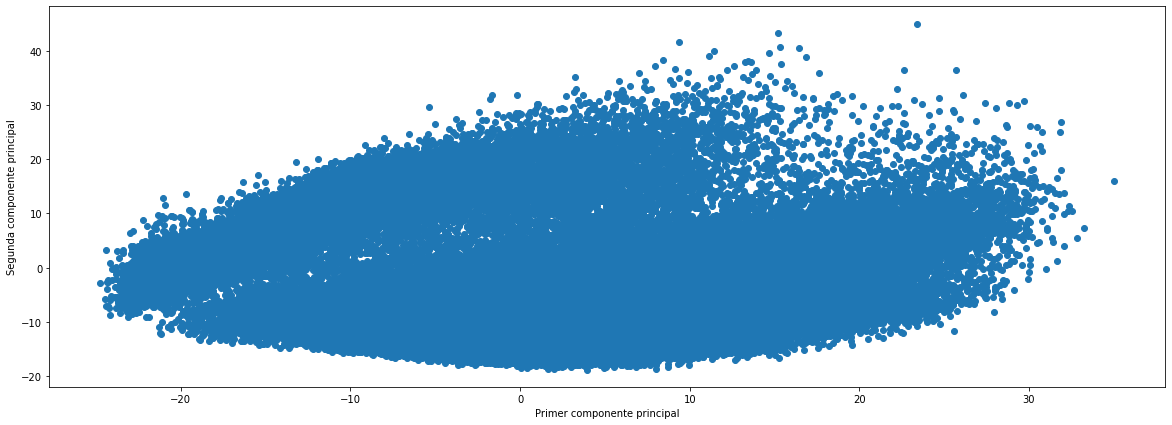

In [ ]:
fig, ax = plt.subplots(figsize = (20, 7))

# Hacemos un scatter plot de cada uno de los datos
ax.scatter(X_pca[:, 0], X_pca[:, 1])

# Por cada dato escribimos a qué instancia corresponde //// saco las etiquetas para que tarde menos en correr la celda
#for i in range(X_train_scaled.shape[0]):
#  ax.text(X_pca[i, 0], X_pca[i, 1], s = i)

ax.set_xlabel('Primer componente principal')
ax.set_ylabel('Segunda componente principal')

 ### Sexto paso
Hacer k-means con k=2 sobre los datos del espacio 2D formado por la primera y segunda componente principal.
Visualizo algunos ejemplos correspondientes a cada uno de los clusters creados

In [ ]:
# importamos los algoritmos de clusterizacion a utilizar en esta notebook
from sklearn.cluster import KMeans                    # K-means
from sklearn.cluster import AgglomerativeClustering   # Clustering jerárquico

# Creación del modelo KMeans con k = 2
kmeans = KMeans(n_clusters=2)

# Ajuste del modelo a los datos reducidos en componentes principales
kmeans.fit(X_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Text(0, 0.5, 'Segunda componente principal')

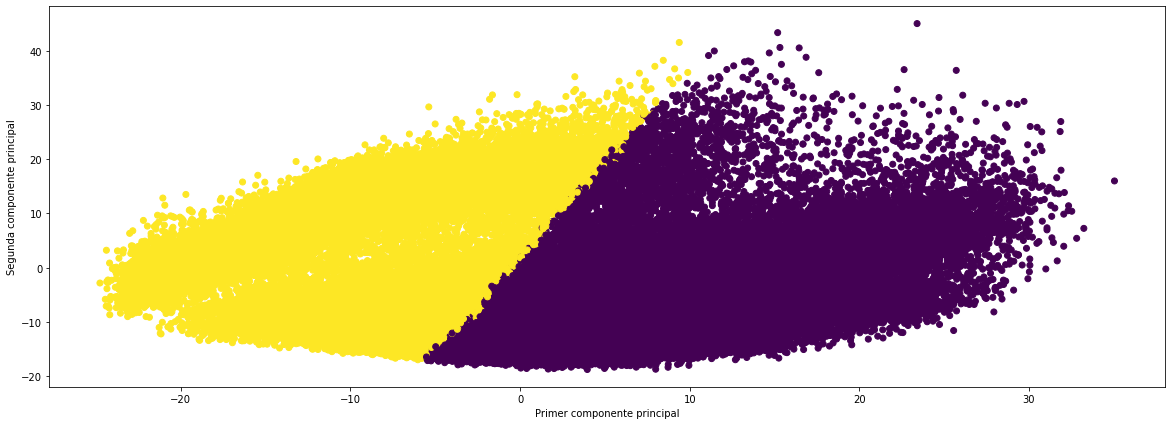

In [ ]:

fig, ax = plt.subplots(figsize = (20, 7))

# Hacemos un scatter plot de cada uno de los datos
ax.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_)



ax.set_xlabel('Primer componente principal')
ax.set_ylabel('Segunda componente principal')

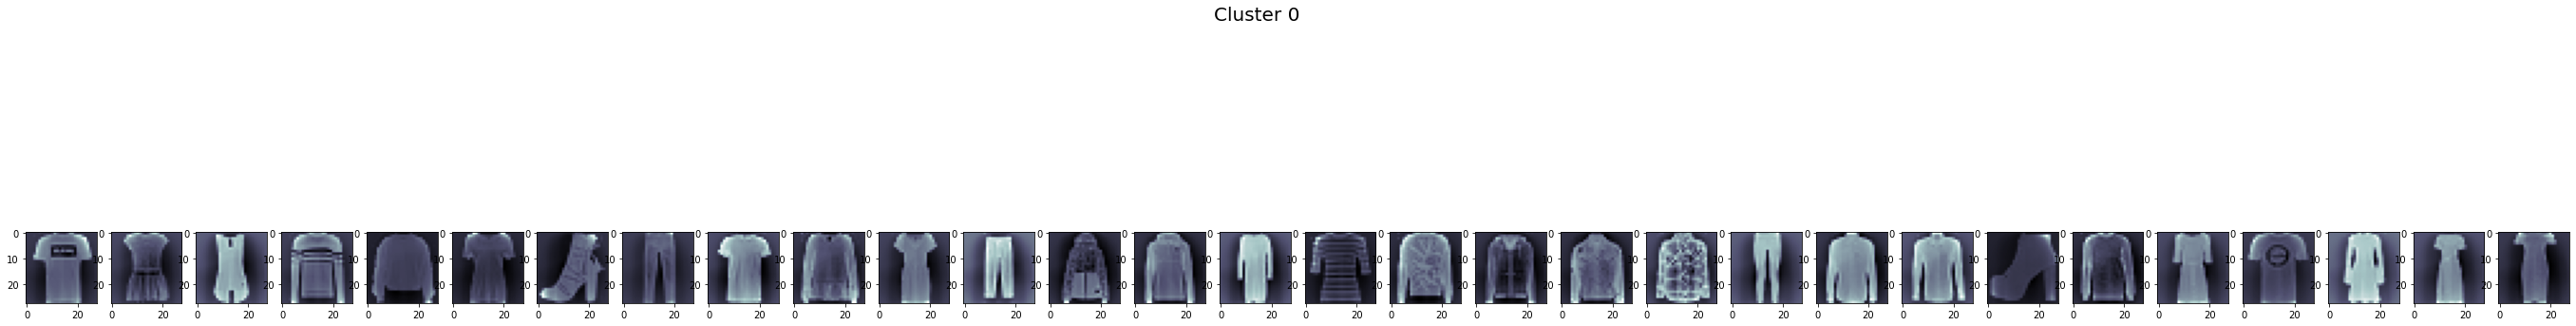

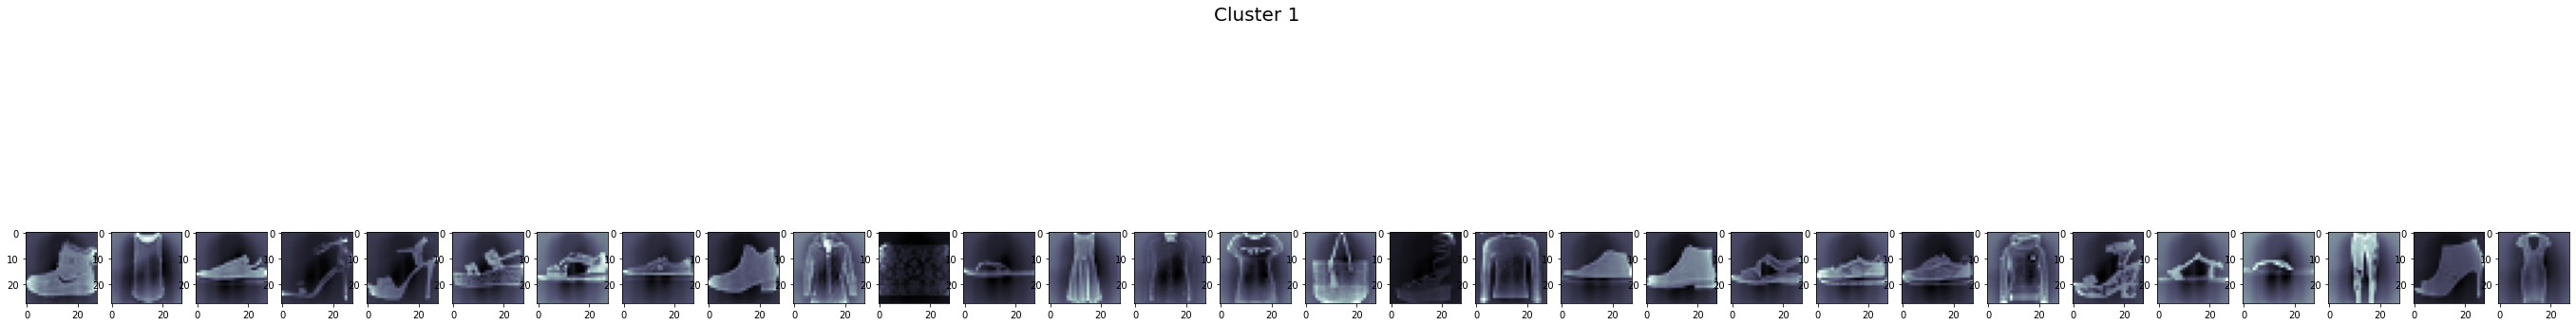

In [ ]:
# Mostrar el resultado final
labels = kmeans.labels_
# Iniciamos un for con k=2 iteraciones
for i in range(2):
    index = np.nonzero(labels==i)[0]                                    # los índices correspondientes a la i-ésima etiqueta
    num = len(index)                                                   # el número de samples en cada cluster
    imagenes = X_train_scaled[index].reshape(len(index),28,28)                  # reshapeamos los samples del i-ésimo cluster para que tenga el formato de una imagen de (64,64) pixeles
    fig, axes = plt.subplots(1, 30, figsize=(48, 8))
    fig.suptitle("Cluster " + str(i), fontsize=20)
    for i, ax in enumerate(axes.flat):
        ax.imshow(imagenes[i], cmap='bone')

In [ ]:
kmeans.labels_

array([1, 0, 1, ..., 0, 1, 1], dtype=int32)

In [ ]:
kmeans.labels_.shape

###Septimo paso

Usando los ids del clustering como etiquetas, entreno un modelo KNN (K=5) usando los datos de entrenamiento (con todos los features).

In [ ]:
#usamos X_train y kmeans.labels_ como etiquetas

y_etiquetas = kmeans.labels_


from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier


clf = KNeighborsClassifier(n_neighbors=5) # clasificador
clf.fit(X_train, y_etiquetas) # una sola vez




KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## Octavo paso

In [ ]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
#Las etiquetas de sandal, sneaker, bag & boot seran 1 y el resto 0, segun como funciono el clustering de Kmeans.

for i in [5, 7, 8, 9]:
  index = y_test==i


In [ ]:
index

array([ True, False, False, ..., False, False, False])

In [ ]:
y_test_etiquetas = index.astype(int)

In [ ]:
y_test_etiquetas

array([1, 0, 0, ..., 0, 0, 0])

###Noveno paso
Aplico el modelo KNN a datos del dataset de evaluación
Construyo una matriz de confusión para evaluar la performance del clasificador KNN.

In [ ]:
y_pred = clf.predict(X_test[:1000])

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(confusion_matrix(y_test_etiquetas[:1000], y_pred))

acc = accuracy_score(y_test_etiquetas[:1000], y_pred)

print(acc)

[[534 371]
 [ 10  85]]
0.619


Elijo visualizar un poco los resultados del clasificador (una muestra de cada etiqueta + una etiqueta bien asignada (exitos) + una etiqueta mal asignada (fracaso
)

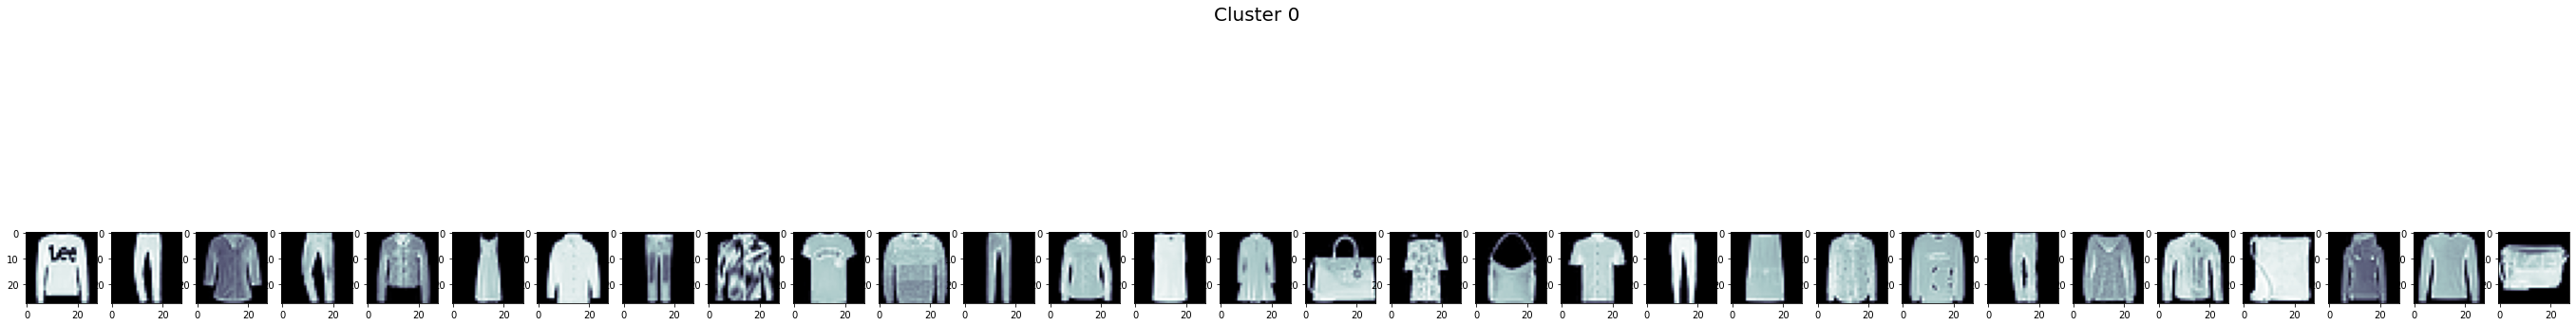

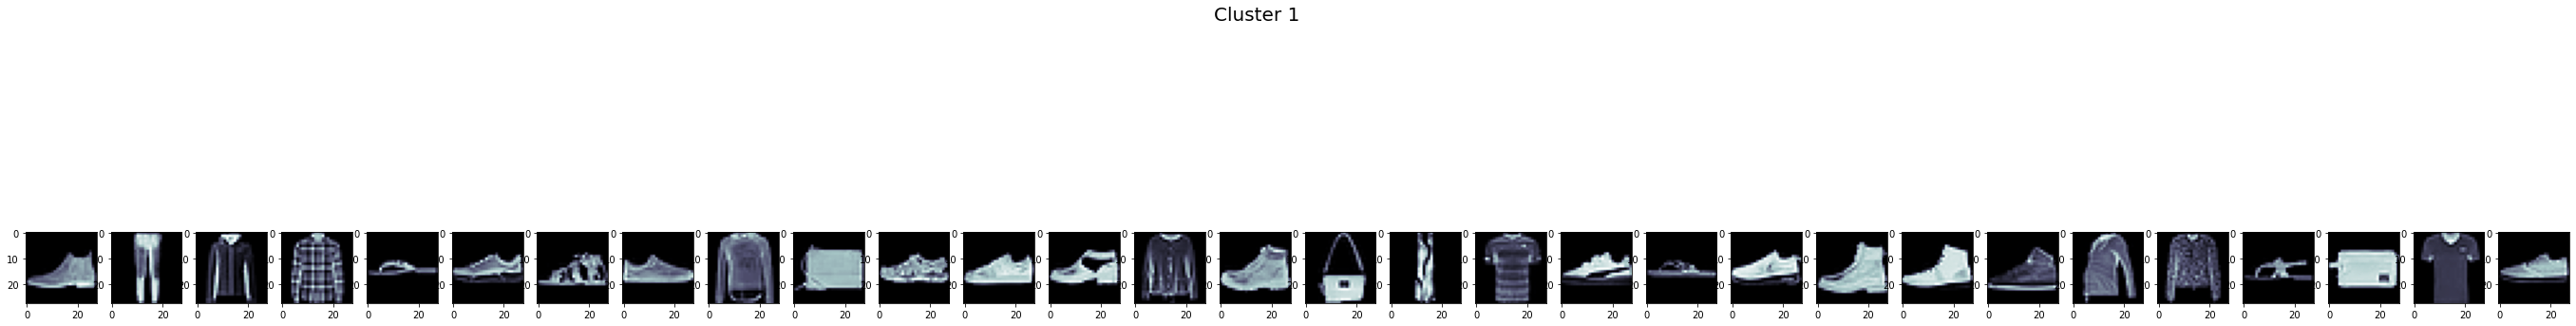

In [ ]:
# Mostrar el resultado final
labels2 = y_pred
# Iniciamos un for con k=2 iteraciones
for i in range(2):
    index = np.nonzero(labels2==i)[0]                                    # los índices correspondientes a la i-ésima etiqueta
    num = len(index)                                                   # el número de samples en cada cluster
    imagenes = X_test[index].reshape(len(index),28,28)                  # reshapeamos los samples del i-ésimo cluster para que tenga el formato de una imagen de (64,64) pixeles
    fig, axes = plt.subplots(1, 30, figsize=(48, 8))
    fig.suptitle("Cluster " + str(i), fontsize=20)
    for i, ax in enumerate(axes.flat):
        ax.imshow(imagenes[i], cmap='bone')

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from random import shuffle

In [ ]:
exitos = []
fracasos = []

for i in range(1000):
  if y_pred[i] == y_test_etiquetas[i]:
    exitos.append(i)
  fracasos.append(i)

In [ ]:
exitos

[0,
 1,
 2,
 4,
 5,
 10,
 13,
 14,
 15,
 17,
 19,
 20,
 23,
 24,
 26,
 27,
 28,
 29,
 30,
 33,
 34,
 39,
 40,
 41,
 42,
 44,
 46,
 47,
 49,
 50,
 53,
 54,
 55,
 56,
 57,
 64,
 67,
 68,
 69,
 72,
 73,
 74,
 76,
 77,
 79,
 81,
 83,
 85,
 86,
 87,
 88,
 89,
 92,
 94,
 97,
 98,
 99,
 101,
 103,
 107,
 108,
 109,
 113,
 115,
 117,
 119,
 121,
 122,
 123,
 124,
 125,
 127,
 130,
 131,
 132,
 133,
 134,
 136,
 137,
 138,
 140,
 141,
 143,
 144,
 145,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 155,
 156,
 158,
 159,
 161,
 162,
 163,
 165,
 166,
 168,
 169,
 170,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 185,
 186,
 187,
 188,
 190,
 192,
 193,
 195,
 197,
 199,
 200,
 201,
 203,
 205,
 206,
 208,
 210,
 212,
 213,
 214,
 215,
 216,
 219,
 223,
 227,
 229,
 232,
 233,
 234,
 235,
 238,
 239,
 241,
 242,
 244,
 246,
 247,
 248,
 249,
 250,
 252,
 255,
 256,
 258,
 259,
 260,
 263,
 264,
 266,
 267,
 268,
 269,
 270,
 272,
 273,
 274,
 275,
 277,
 279,
 280,
 281,


0
6


([], <a list of 0 Text major ticklabel objects>)

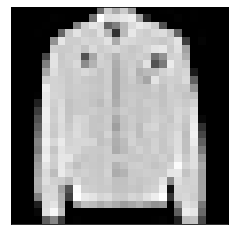

In [ ]:
#Elijo el indice 44 que corresponde a un exito
print(y_test_etiquetas[44])
print(y_test[44])
n=exitos[44] # elijo uno de los exitos

fig = plt.figure(figsize = (4,4))
plt.imshow(X_test_raw[n], interpolation='none', cmap="gray") # plotea la imagen correspondiente
#plt.title("Nuevo sample, clase: {}".format(categories[y_test[n]]), fontsize = 10) # pongo el titulo a los plots con el nombre de la clase a la que pertenece la imagen y seteo el tamano de letra
plt.xticks([]) # le saco los ticks en el eje X
plt.yticks([]) # le saco los ticks en el eje Y





In [ ]:
#En este caso lo hizo correctamente al asignar una etiqueta del cluster 0 a una remera

100
0
7


([], <a list of 0 Text major ticklabel objects>)

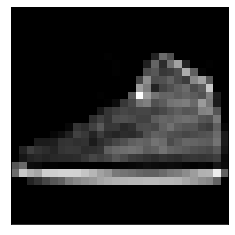

In [ ]:
#Elijo el indice 45 que corresponde a un fracaso
print(y_test_etiquetas[45])
print(y_test[45])
n=fracasos[45] # elijo uno de los exitos

fig = plt.figure(figsize = (4,4))
plt.imshow(X_test_raw[n], interpolation='none', cmap="gray") # plotea la imagen correspondiente
#plt.title("Nuevo sample, clase: {}".format(categories[y_test[n]]), fontsize = 10) # pongo el titulo a los plots con el nombre de la clase a la que pertenece la imagen y seteo el tamano de letra
plt.xticks([]) # le saco los ticks en el eje X
plt.yticks([]) # le saco los ticks en el eje Y


In [ ]:
#En este caso lo hizo erroneamente al asignar una etiqueta 0 a una zapatilla